# Characterization of Symbol Error Rate 


In [1]:
# Import Transmitter
from vlc_rm.transmitter import Transmitter
# Import Photodetector
from vlc_rm.photodetector import Photodetector
# Import Indoor Environment
from vlc_rm.indoorenv import Indoorenv
# Import REcursiveModel
from vlc_rm.recursivemodel import Recursivemodel
# Import Symbol Error Rate
from vlc_rm.ser import SymbolErrorRate
# Import Symbol Constants
from vlc_rm.constants import Constants as Kt

# Import numpy
import numpy as np

#Import luxpy   
import luxpy as lx

# Import Matplotlob
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.facecolor']='white'

## Transmitter:
The transmitter of a system is defined from a set of parameters as follows:

In [3]:
# Create a transmitter-type object
transmitter = Transmitter(
        "Led1",
        led_type='gaussian',
        reference='',
        position=[2.5, 2.5, 3],
        normal=[0, 0, -1],
        mlambert=1,
        wavelengths=[620, 530, 475],
        fwhm=[20, 30, 20],
        constellation='ieee16',
        luminous_flux=5000
                )
print(transmitter)

pd = Photodetector(
    "PD1",
    position=[2.5, 2.5, 0.85],
    normal=[0, 0, 1],
    area=(1e-4)/3,
    #area=1e-4,
    fov=85,
    sensor='S10917-35GT',
    # sensor='TCS3103-04',
    idark=1e-12,
    bandwidth=1.2e5,
    gain=1e0
            )
print(pd)
print(pd.SENSORS_LIST)

room = Indoorenv(
    "Room",
    size=[5, 5, 3],
    no_reflections=10,
    resolution=1/10,
    ceiling=[0.82, 0.71, 0.64],
    west=[0.82, 0.71, 0.64],
    north=[0.82, 0.71, 0.64],
    east=[0.82, 0.71, 0.64],
    south=[0.82, 0.71, 0.64],
    floor=[0.635, 0.61, 0.58]
        )
room.create_environment(transmitter, pd)
print(room)


# Define Channel Model
channel_model = Recursivemodel(
    "ChannelModelA",
    transmitter,
    pd,
    room
    )



ValueError: reference must be 'RGB-Phosphor'

## Define parameters: Matrix - Sensor - Receiver's position

In [ ]:
# positions
center_xyz = [2.5, 2.5, 0.85]
middle_xyz = [1.5, 1.5, 0.85]
corner_xyz = [0.5, 0.5, 0.85]
positions = [center_xyz, middle_xyz, corner_xyz]

center = 0
middle = 1 
corner = 2

pos_names = ['center', 'middle', 'corner']

pos = corner
# pd.sensor = 'TCS3103-04'
pd.sensor = 'S10917-35GT'
pd.gain = 2e5

# pd.plot_responsivity()

pos_name = pos_names[pos]
position = positions[pos] 

# if pd.sensor == 'S10917-35GT':
#     transmitter.constellation = hamamatsu_constellations[matrix]
# elif pd.sensor == 'TCS3103-04':
#     transmitter.constellation = taos_constellations[matrix]

# Define a photodetector position
pd.position = position
# Compute the paramteres of the indoor enviorment
room.create_environment(transmitter, pd, mode='modified')        
# Simulate indoor channel
channel_model.simulate_channel()
print(channel_model)    
        
# plt.plot(channel_model._spd_total)


 Creating parameters of indoor environment ...
Parameters created!


 Simulating indoor environment ...
Simulation done! 


|=============== Simulation results ================|
Name: ChannelModelA 
DC-Gain with respect to 1-W [W]: 
 [1.2142e-06 9.3655e-07 8.0775e-07] 
Crosstalk Matrix at 1-lm: 
[[7.2667e-10 1.1782e-13 3.2769e-14]
 [1.0939e-11 3.3321e-10 1.3997e-10]
 [3.7658e-12 5.4836e-11 1.8101e-09]] 
Crosstalk Matrix at 5000.0-lm: 
 [[3.6333e-06 5.8912e-10 1.6384e-10]
 [5.4697e-08 1.6661e-06 6.9984e-07]
 [1.8829e-08 2.7418e-07 9.0503e-06]] 
Crosstalk Matrix with photodetector gain of 200000.0: 
 [[7.2667e-01 1.1782e-04 3.2769e-05]
 [1.0939e-02 3.3321e-01 1.3997e-01]
 [3.7658e-03 5.4836e-02 1.8101e+00]] 
Lighting Parameters at 5000.0-lm 
Illuminance [lx]: [[1.4792e+02]] 
CIExyz: [[2.7689e-01 2.1399e-01 5.0912e-01]] 
CCT: [[-8.3461e+04]] 
CRI: [[1.4394e+01]] 
Min-Distance: 2.136585272293555e-10 



## Compute the Symbol Error Rate

In [ ]:
# Degine Symbols Error Rate module
ser = SymbolErrorRate(
    name='ser',
    recursivemodel=channel_model,
    no_symbols=1e5
    )


 Computing the Symbol Error Rate curves ...
Symbol error rate computed for 1.0 lumens
Symbol error rate computed for 2500.8 lumens
Symbol error rate computed for 5000.6 lumens
Symbol error rate computed for 7500.400000000001 lumens
Symbol error rate computed for 10000.2 lumens
Symbol error rate computed for 12500.0 lumens
SER computation done!

Experiment 1 of 100

 Computing the Symbol Error Rate curves ...
Symbol error rate computed for 1.0 lumens
Symbol error rate computed for 2500.8 lumens
Symbol error rate computed for 5000.6 lumens
Symbol error rate computed for 7500.400000000001 lumens
Symbol error rate computed for 10000.2 lumens
Symbol error rate computed for 12500.0 lumens
SER computation done!

Experiment 2 of 100

 Computing the Symbol Error Rate curves ...
Symbol error rate computed for 1.0 lumens
Symbol error rate computed for 2500.8 lumens
Symbol error rate computed for 5000.6 lumens
Symbol error rate computed for 7500.400000000001 lumens
Symbol error rate computed for 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


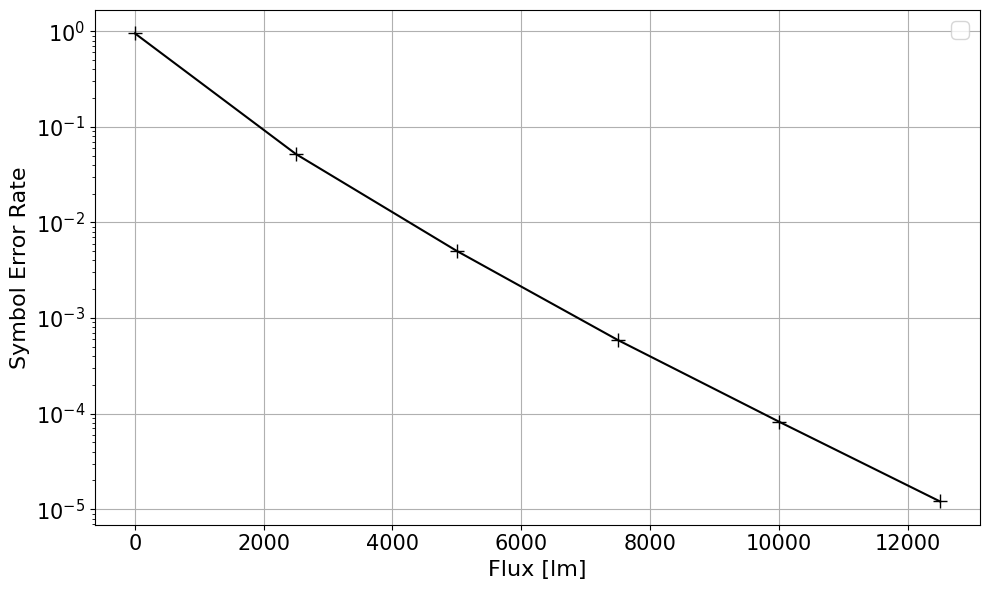

In [ ]:
NO_FLUX_POINTS = 5
NO_EXPERIMENTS = 100
total_ser = np.zeros(NO_FLUX_POINTS + 1)
for experiment in range(NO_EXPERIMENTS):
    ser.recursivemodel= channel_model
    ser.compute_ser_flux(
        min_flux=1,
        max_flux=12.5e3,
        points_flux=NO_FLUX_POINTS
    )
    # ser.plot_ser('flux')
    total_ser += ser._ser_values
    print(f"Experiment {experiment+1} of {NO_EXPERIMENTS}")

total_ser = total_ser / NO_EXPERIMENTS


fig = plt.figure(figsize=(10,6))

plt.plot(
    ser._flux_values,
    total_ser,                         
    color='black',
    marker='+',
    markersize=10    
    )


# convert y-axis to Logarithmic scale
plt.yscale("log")    

plt.xlabel('Flux [lm]', fontsize=16)
plt.ylabel('Symbol Error Rate', fontsize=16)
plt.xticks(fontsize=15)
# ax.set_yticks(np.linspace(1, 25, 25))
plt.yticks(fontsize=15) 
plt.tight_layout()

# # Set axes limits  
# plt.ylim(0.3,0.44)
# plt.xlim(25, 40) 

# plt.title('Quadrangles and Centers for Different Temperatures')
plt.legend(
    loc='upper right',
    fontsize=16,
    ncol=2
)
plt.grid(True)
plt.show()


np.savetxt(
    "data-ser/{}-hamamatsu-ser.txt".format(pos_name), 
    [ser._flux_values, total_ser], 
    delimiter=' ')
